In [ ]:
#Скрипт по файлу https://github.com/HimariO/mmediting-meme/blob/master/demo/inpainting_demo.py

In [4]:
#!pip install mmcv

In [5]:
#!pip install mmedit

In [30]:
import glob

import os
import mmcv
import torch
import matplotlib.pyplot as plt

from PIL import Image

from mmedit.apis import init_model, inpainting_inference
from mmedit.core import tensor2img

In [20]:
data_dir = '/media/alex/Storage/coding/HimariO/HatefulMemesChallenge/data/hateful_memes/'
config = 'configs/inpainting/deepfillv2/deepfillv2_256x256_8x2_places.py'

checkpoint = 'deepfillv2_256x256_8x2_places_20200619-10d15793.pth'

mask_path = os.path.join(data_dir, 'img_mask_3px/')
save_path = os.path.join(data_dir, 'img_clean')

In [36]:
def main_dir(save_dir, config, checkpoint, img_dir, imshow):
    os.makedirs(save_dir, exist_ok=True)

    model = init_model(
        config, checkpoint, device=torch.device('cuda'))

    img_and_mask = glob.glob(os.path.join(img_dir, '*.png'))
    img_map = {}
    mask_map = {}
    for path in img_and_mask:
        name = os.path.basename(path)
        imgid = name.split('.')[0]
        if '.mask' in name:
            mask_map[imgid] = path
        else:
            img_map[imgid] = path

    for i, imgid in enumerate(img_map.keys()):
        print(f"[{i}/{len(img_map)}] {imgid}")
        masked_img_path = img_map[imgid]
        mask_path = mask_map[imgid]
        img_name = os.path.basename(masked_img_path)
        
        result = inpainting_inference(model, masked_img_path, mask_path)
        result = tensor2img(result, min_max=(-1, 1))[..., ::-1]
        h, w = mmcv.imread(masked_img_path).shape[:2]
        result = result[:h, :w, ...]

        save_path = os.path.join(save_dir, img_name)
        mmcv.imwrite(result, save_path)
        if imshow:
            plt.imshow(Image.fromarray(result[:,:,::-1]))#convert to rgb
            break

In [38]:
main_dir(save_path, config, checkpoint, mask_path, False)

load checkpoint from local path: deepfillv2_256x256_8x2_places_20200619-10d15793.pth
[0/10000] 48059
[1/10000] 01235
[2/10000] 01236
[3/10000] 01243
[4/10000] 01245
[5/10000] 01247
[6/10000] 01256
[7/10000] 01258
[8/10000] 01264
[9/10000] 01268
[10/10000] 10675
[11/10000] 10682
[12/10000] 10689
[13/10000] 10692
[14/10000] 10693
[15/10000] 10725
[16/10000] 10732
[17/10000] 10734
[18/10000] 10743
[19/10000] 18546
[20/10000] 18547
[21/10000] 18593
[22/10000] 18594
[23/10000] 18597
[24/10000] 18607
[25/10000] 18632
[26/10000] 18640
[27/10000] 18650
[28/10000] 06584
[29/10000] 06589
[30/10000] 06593
[31/10000] 06597
[32/10000] 06712
[33/10000] 06714
[34/10000] 06715
[35/10000] 06723
[36/10000] 06725
[37/10000] 01327
[38/10000] 01469
[39/10000] 01578
[40/10000] 01743
[41/10000] 01894
[42/10000] 02153
[43/10000] 02374
[44/10000] 02519
[45/10000] 02654
[46/10000] 02815
[47/10000] 02945
[48/10000] 14793
[49/10000] 14802
[50/10000] 14823
[51/10000] 14829
[52/10000] 14830
[53/10000] 14836
[54/100

[457/10000] 16438
[458/10000] 24519
[459/10000] 24537
[460/10000] 24538
[461/10000] 24567
[462/10000] 24570
[463/10000] 24573
[464/10000] 24576
[465/10000] 24579
[466/10000] 24580
[467/10000] 01423
[468/10000] 01436
[469/10000] 01439
[470/10000] 01452
[471/10000] 01456
[472/10000] 01459
[473/10000] 01465
[474/10000] 01467
[475/10000] 01468
[476/10000] 04126
[477/10000] 04127
[478/10000] 04132
[479/10000] 04135
[480/10000] 04138
[481/10000] 04152
[482/10000] 04153
[483/10000] 04156
[484/10000] 04157
[485/10000] 04162
[486/10000] 05462
[487/10000] 05463
[488/10000] 05468
[489/10000] 05471
[490/10000] 05476
[491/10000] 05479
[492/10000] 05482
[493/10000] 05483
[494/10000] 05489
[495/10000] 09587
[496/10000] 09615
[497/10000] 09617
[498/10000] 09618
[499/10000] 09623
[500/10000] 09624
[501/10000] 09634
[502/10000] 09638
[503/10000] 09641
[504/10000] 02657
[505/10000] 02674
[506/10000] 02687
[507/10000] 02691
[508/10000] 02716
[509/10000] 02718
[510/10000] 02719
[511/10000] 02735
[512/10000

[913/10000] 12068
[914/10000] 12074
[915/10000] 12086
[916/10000] 12093
[917/10000] 12094
[918/10000] 12096
[919/10000] 12309
[920/10000] 12348
[921/10000] 12349
[922/10000] 01579
[923/10000] 01589
[924/10000] 01598
[925/10000] 01627
[926/10000] 01634
[927/10000] 01637
[928/10000] 01642
[929/10000] 01643
[930/10000] 01649
[931/10000] 01653
[932/10000] 17928
[933/10000] 17932
[934/10000] 17935
[935/10000] 17938
[936/10000] 17948
[937/10000] 17950
[938/10000] 17953
[939/10000] 17956
[940/10000] 17962
[941/10000] 20786
[942/10000] 20791
[943/10000] 20795
[944/10000] 20814
[945/10000] 20815
[946/10000] 20819
[947/10000] 20835
[948/10000] 20837
[949/10000] 20851
[950/10000] 24781
[951/10000] 24783
[952/10000] 24791
[953/10000] 24806
[954/10000] 24810
[955/10000] 24815
[956/10000] 24835
[957/10000] 24836
[958/10000] 24851
[959/10000] 24853
[960/10000] 04316
[961/10000] 04319
[962/10000] 04321
[963/10000] 04325
[964/10000] 04326
[965/10000] 04328
[966/10000] 04356
[967/10000] 04361
[968/10000

[1349/10000] 02974
[1350/10000] 02975
[1351/10000] 02983
[1352/10000] 02984
[1353/10000] 02987
[1354/10000] 03124
[1355/10000] 03128
[1356/10000] 03145
[1357/10000] 03146
[1358/10000] 03148
[1359/10000] 07294
[1360/10000] 07312
[1361/10000] 07314
[1362/10000] 07318
[1363/10000] 07319
[1364/10000] 07325
[1365/10000] 07345
[1366/10000] 07351
[1367/10000] 07354
[1368/10000] 20971
[1369/10000] 20974
[1370/10000] 20978
[1371/10000] 20984
[1372/10000] 21035
[1373/10000] 21038
[1374/10000] 21043
[1375/10000] 21047
[1376/10000] 21048
[1377/10000] 21053
[1378/10000] 01829
[1379/10000] 01835
[1380/10000] 01836
[1381/10000] 01842
[1382/10000] 01845
[1383/10000] 01854
[1384/10000] 01865
[1385/10000] 01875
[1386/10000] 01892
[1387/10000] 04651
[1388/10000] 04658
[1389/10000] 04675
[1390/10000] 04682
[1391/10000] 04683
[1392/10000] 04689
[1393/10000] 04695
[1394/10000] 04712
[1395/10000] 04716
[1396/10000] 19420
[1397/10000] 19426
[1398/10000] 19427
[1399/10000] 19430
[1400/10000] 19438
[1401/10000]

[1781/10000] 08795
[1782/10000] 08917
[1783/10000] 08924
[1784/10000] 08934
[1785/10000] 08937
[1786/10000] 08941
[1787/10000] 08954
[1788/10000] 14238
[1789/10000] 14239
[1790/10000] 14259
[1791/10000] 14260
[1792/10000] 14263
[1793/10000] 14267
[1794/10000] 14268
[1795/10000] 14275
[1796/10000] 14276
[1797/10000] 01896
[1798/10000] 01924
[1799/10000] 01925
[1800/10000] 01936
[1801/10000] 01937
[1802/10000] 01943
[1803/10000] 01953
[1804/10000] 01954
[1805/10000] 01956
[1806/10000] 21354
[1807/10000] 21364
[1808/10000] 21385
[1809/10000] 21386
[1810/10000] 21387
[1811/10000] 21394
[1812/10000] 21403
[1813/10000] 21405
[1814/10000] 21408
[1815/10000] 19587
[1816/10000] 19602
[1817/10000] 19604
[1818/10000] 19630
[1819/10000] 19634
[1820/10000] 19635
[1821/10000] 19637
[1822/10000] 19643
[1823/10000] 19647
[1824/10000] 19650
[1825/10000] 15728
[1826/10000] 15734
[1827/10000] 15738
[1828/10000] 15743
[1829/10000] 15746
[1830/10000] 15763
[1831/10000] 15768
[1832/10000] 15796
[1833/10000]

[2213/10000] 25497
[2214/10000] 25498
[2215/10000] 25610
[2216/10000] 03624
[2217/10000] 03629
[2218/10000] 03642
[2219/10000] 03659
[2220/10000] 03675
[2221/10000] 03678
[2222/10000] 03681
[2223/10000] 03685
[2224/10000] 03691
[2225/10000] 23908
[2226/10000] 23910
[2227/10000] 23940
[2228/10000] 23954
[2229/10000] 23957
[2230/10000] 23961
[2231/10000] 23968
[2232/10000] 23971
[2233/10000] 24019
[2234/10000] 09217
[2235/10000] 09238
[2236/10000] 09241
[2237/10000] 09247
[2238/10000] 09248
[2239/10000] 09251
[2240/10000] 09263
[2241/10000] 09265
[2242/10000] 09267
[2243/10000] 14569
[2244/10000] 14570
[2245/10000] 14573
[2246/10000] 14580
[2247/10000] 14583
[2248/10000] 14589
[2249/10000] 14590
[2250/10000] 14598
[2251/10000] 14602
[2252/10000] 19825
[2253/10000] 19834
[2254/10000] 19836
[2255/10000] 19837
[2256/10000] 19845
[2257/10000] 19846
[2258/10000] 19860
[2259/10000] 19875
[2260/10000] 20134
[2261/10000] 02316
[2262/10000] 02317
[2263/10000] 02351
[2264/10000] 02356
[2265/10000]

[2647/10000] 46831
[2648/10000] 46832
[2649/10000] 46837
[2650/10000] 46850
[2651/10000] 46852
[2652/10000] 46853
[2653/10000] 46857
[2654/10000] 46870
[2655/10000] 46872
[2656/10000] 25706
[2657/10000] 25943
[2658/10000] 26137
[2659/10000] 26319
[2660/10000] 26409
[2661/10000] 26495
[2662/10000] 26571
[2663/10000] 26839
[2664/10000] 26985
[2665/10000] 27185
[2666/10000] 27418
[2667/10000] 32947
[2668/10000] 32956
[2669/10000] 32957
[2670/10000] 32960
[2671/10000] 32965
[2672/10000] 32971
[2673/10000] 32974
[2674/10000] 32980
[2675/10000] 32981
[2676/10000] 48516
[2677/10000] 48517
[2678/10000] 48520
[2679/10000] 48523
[2680/10000] 48539
[2681/10000] 48567
[2682/10000] 48570
[2683/10000] 48573
[2684/10000] 48579
[2685/10000] 31570
[2686/10000] 31586
[2687/10000] 31590
[2688/10000] 31604
[2689/10000] 31605
[2690/10000] 31609
[2691/10000] 31625
[2692/10000] 31627
[2693/10000] 31629
[2694/10000] 40761
[2695/10000] 40791
[2696/10000] 40792
[2697/10000] 40796
[2698/10000] 40813
[2699/10000]

[3079/10000] 42538
[3080/10000] 42568
[3081/10000] 42580
[3082/10000] 42589
[3083/10000] 42591
[3084/10000] 42597
[3085/10000] 40982
[3086/10000] 40987
[3087/10000] 41023
[3088/10000] 41032
[3089/10000] 41035
[3090/10000] 41037
[3091/10000] 41057
[3092/10000] 41058
[3093/10000] 41062
[3094/10000] 48731
[3095/10000] 48735
[3096/10000] 48739
[3097/10000] 48751
[3098/10000] 48756
[3099/10000] 48760
[3100/10000] 48762
[3101/10000] 48790
[3102/10000] 48792
[3103/10000] 48905
[3104/10000] 30486
[3105/10000] 30487
[3106/10000] 30489
[3107/10000] 30492
[3108/10000] 30518
[3109/10000] 30526
[3110/10000] 30527
[3111/10000] 30546
[3112/10000] 30548
[3113/10000] 30549
[3114/10000] 34157
[3115/10000] 34162
[3116/10000] 34165
[3117/10000] 34170
[3118/10000] 34178
[3119/10000] 34179
[3120/10000] 34180
[3121/10000] 34186
[3122/10000] 34189
[3123/10000] 36581
[3124/10000] 36590
[3125/10000] 36597
[3126/10000] 36598
[3127/10000] 36710
[3128/10000] 36724
[3129/10000] 36725
[3130/10000] 36729
[3131/10000]

[3511/10000] 47589
[3512/10000] 47591
[3513/10000] 47592
[3514/10000] 47596
[3515/10000] 47598
[3516/10000] 47601
[3517/10000] 35687
[3518/10000] 35689
[3519/10000] 35691
[3520/10000] 35692
[3521/10000] 35701
[3522/10000] 35708
[3523/10000] 35709
[3524/10000] 35716
[3525/10000] 35719
[3526/10000] 42705
[3527/10000] 42706
[3528/10000] 42715
[3529/10000] 42736
[3530/10000] 42739
[3531/10000] 42751
[3532/10000] 42759
[3533/10000] 42763
[3534/10000] 42783
[3535/10000] 42786
[3536/10000] 46295
[3537/10000] 46301
[3538/10000] 46302
[3539/10000] 46310
[3540/10000] 46312
[3541/10000] 46315
[3542/10000] 46318
[3543/10000] 46352
[3544/10000] 46357
[3545/10000] 27634
[3546/10000] 27635
[3547/10000] 27648
[3548/10000] 27659
[3549/10000] 27685
[3550/10000] 27801
[3551/10000] 27803
[3552/10000] 27806
[3553/10000] 27810
[3554/10000] 38196
[3555/10000] 38201
[3556/10000] 38209
[3557/10000] 38210
[3558/10000] 38215
[3559/10000] 38217
[3560/10000] 38245
[3561/10000] 38246
[3562/10000] 38251
[3563/10000]

[3943/10000] 49176
[3944/10000] 49178
[3945/10000] 49185
[3946/10000] 49201
[3947/10000] 49208
[3948/10000] 49213
[3949/10000] 49215
[3950/10000] 32409
[3951/10000] 32410
[3952/10000] 32415
[3953/10000] 32416
[3954/10000] 32451
[3955/10000] 32459
[3956/10000] 32468
[3957/10000] 32470
[3958/10000] 32480
[3959/10000] 45167
[3960/10000] 45172
[3961/10000] 45176
[3962/10000] 45179
[3963/10000] 45180
[3964/10000] 45182
[3965/10000] 45189
[3966/10000] 45197
[3967/10000] 45198
[3968/10000] 35870
[3969/10000] 35890
[3970/10000] 35894
[3971/10000] 35896
[3972/10000] 35902
[3973/10000] 35907
[3974/10000] 35910
[3975/10000] 35912
[3976/10000] 35917
[3977/10000] 42931
[3978/10000] 42936
[3979/10000] 42953
[3980/10000] 42958
[3981/10000] 42961
[3982/10000] 42967
[3983/10000] 42970
[3984/10000] 42975
[3985/10000] 42983
[3986/10000] 38509
[3987/10000] 38514
[3988/10000] 38516
[3989/10000] 38527
[3990/10000] 38529
[3991/10000] 38546
[3992/10000] 38547
[3993/10000] 38549
[3994/10000] 38574
[3995/10000]

[4377/10000] 45316
[4378/10000] 45317
[4379/10000] 45318
[4380/10000] 45320
[4381/10000] 45326
[4382/10000] 45368
[4383/10000] 45370
[4384/10000] 45371
[4385/10000] 45379
[4386/10000] 42987
[4387/10000] 43015
[4388/10000] 43025
[4389/10000] 43026
[4390/10000] 43051
[4391/10000] 43052
[4392/10000] 43065
[4393/10000] 43078
[4394/10000] 43082
[4395/10000] 43085
[4396/10000] 49601
[4397/10000] 49607
[4398/10000] 49608
[4399/10000] 49613
[4400/10000] 49615
[4401/10000] 49618
[4402/10000] 49621
[4403/10000] 49630
[4404/10000] 49635
[4405/10000] 49650
[4406/10000] 26750
[4407/10000] 26759
[4408/10000] 26781
[4409/10000] 26784
[4410/10000] 26794
[4411/10000] 26795
[4412/10000] 26803
[4413/10000] 26831
[4414/10000] 26835
[4415/10000] 36081
[4416/10000] 36089
[4417/10000] 36092
[4418/10000] 36095
[4419/10000] 36097
[4420/10000] 36098
[4421/10000] 36102
[4422/10000] 36107
[4423/10000] 36109
[4424/10000] 41823
[4425/10000] 41830
[4426/10000] 41832
[4427/10000] 41835
[4428/10000] 41852
[4429/10000]

[4810/10000] 39051
[4811/10000] 39054
[4812/10000] 39056
[4813/10000] 39058
[4814/10000] 28450
[4815/10000] 28451
[4816/10000] 28459
[4817/10000] 28461
[4818/10000] 28463
[4819/10000] 28470
[4820/10000] 28476
[4821/10000] 28479
[4822/10000] 28491
[4823/10000] 28495
[4824/10000] 28504
[4825/10000] 28507
[4826/10000] 28516
[4827/10000] 28517
[4828/10000] 28534
[4829/10000] 32691
[4830/10000] 32695
[4831/10000] 32704
[4832/10000] 32706
[4833/10000] 32714
[4834/10000] 32716
[4835/10000] 32746
[4836/10000] 32750
[4837/10000] 32751
[4838/10000] 32765
[4839/10000] 32768
[4840/10000] 32781
[4841/10000] 32789
[4842/10000] 32794
[4843/10000] 32798
[4844/10000] 32806
[4845/10000] 32841
[4846/10000] 32849
[4847/10000] 32854
[4848/10000] 34961
[4849/10000] 34970
[4850/10000] 34971
[4851/10000] 34972
[4852/10000] 34975
[4853/10000] 34978
[4854/10000] 34981
[4855/10000] 34982
[4856/10000] 34985
[4857/10000] 35016
[4858/10000] 35017
[4859/10000] 35041
[4860/10000] 35048
[4861/10000] 35062
[4862/10000]

[5242/10000] 73508
[5243/10000] 73514
[5244/10000] 62590
[5245/10000] 62597
[5246/10000] 62703
[5247/10000] 62705
[5248/10000] 62710
[5249/10000] 62713
[5250/10000] 62719
[5251/10000] 62731
[5252/10000] 62739
[5253/10000] 59470
[5254/10000] 59471
[5255/10000] 59473
[5256/10000] 59478
[5257/10000] 59487
[5258/10000] 59601
[5259/10000] 59602
[5260/10000] 59613
[5261/10000] 59617
[5262/10000] 56871
[5263/10000] 56872
[5264/10000] 56873
[5265/10000] 56891
[5266/10000] 56907
[5267/10000] 56908
[5268/10000] 56910
[5269/10000] 56912
[5270/10000] 56917
[5271/10000] 64097
[5272/10000] 64125
[5273/10000] 64127
[5274/10000] 64128
[5275/10000] 64130
[5276/10000] 64137
[5277/10000] 64138
[5278/10000] 64153
[5279/10000] 64157
[5280/10000] 64172
[5281/10000] 70843
[5282/10000] 70845
[5283/10000] 70849
[5284/10000] 70851
[5285/10000] 70864
[5286/10000] 70865
[5287/10000] 70912
[5288/10000] 70914
[5289/10000] 70923
[5290/10000] 65389
[5291/10000] 65392
[5292/10000] 65403
[5293/10000] 65407
[5294/10000]

[5675/10000] 53261
[5676/10000] 53268
[5677/10000] 53270
[5678/10000] 53274
[5679/10000] 53278
[5680/10000] 53280
[5681/10000] 53289
[5682/10000] 53291
[5683/10000] 53296
[5684/10000] 53407
[5685/10000] 61438
[5686/10000] 61450
[5687/10000] 61453
[5688/10000] 61458
[5689/10000] 61459
[5690/10000] 61480
[5691/10000] 61482
[5692/10000] 61483
[5693/10000] 61485
[5694/10000] 61492
[5695/10000] 73680
[5696/10000] 73681
[5697/10000] 73690
[5698/10000] 73806
[5699/10000] 73810
[5700/10000] 73814
[5701/10000] 73816
[5702/10000] 73819
[5703/10000] 73841
[5704/10000] 73842
[5705/10000] 57049
[5706/10000] 57063
[5707/10000] 57064
[5708/10000] 57084
[5709/10000] 57089
[5710/10000] 57093
[5711/10000] 57094
[5712/10000] 57103
[5713/10000] 57120
[5714/10000] 57124
[5715/10000] 54793
[5716/10000] 54801
[5717/10000] 54812
[5718/10000] 54816
[5719/10000] 54817
[5720/10000] 54819
[5721/10000] 54820
[5722/10000] 54823
[5723/10000] 54830
[5724/10000] 54831
[5725/10000] 72195
[5726/10000] 72198
[5727/10000]

[6109/10000] 63150
[6110/10000] 63159
[6111/10000] 63174
[6112/10000] 63175
[6113/10000] 63182
[6114/10000] 63185
[6115/10000] 63187
[6116/10000] 63192
[6117/10000] 63201
[6118/10000] 69728
[6119/10000] 69732
[6120/10000] 69750
[6121/10000] 69751
[6122/10000] 69752
[6123/10000] 69753
[6124/10000] 69758
[6125/10000] 69780
[6126/10000] 69804
[6127/10000] 58640
[6128/10000] 58642
[6129/10000] 58649
[6130/10000] 58672
[6131/10000] 58674
[6132/10000] 58679
[6133/10000] 58690
[6134/10000] 58703
[6135/10000] 58706
[6136/10000] 72489
[6137/10000] 72490
[6138/10000] 72504
[6139/10000] 72506
[6140/10000] 72508
[6141/10000] 72509
[6142/10000] 72510
[6143/10000] 72514
[6144/10000] 72531
[6145/10000] 57261
[6146/10000] 57268
[6147/10000] 57280
[6148/10000] 57281
[6149/10000] 57284
[6150/10000] 57286
[6151/10000] 57298
[6152/10000] 57302
[6153/10000] 57312
[6154/10000] 56024
[6155/10000] 56048
[6156/10000] 56071
[6157/10000] 56081
[6158/10000] 56082
[6159/10000] 56091
[6160/10000] 56098
[6161/10000]

[6542/10000] 53817
[6543/10000] 53820
[6544/10000] 60538
[6545/10000] 60539
[6546/10000] 60541
[6547/10000] 60549
[6548/10000] 60571
[6549/10000] 60573
[6550/10000] 60578
[6551/10000] 60592
[6552/10000] 60598
[6553/10000] 50839
[6554/10000] 50841
[6555/10000] 50861
[6556/10000] 50867
[6557/10000] 50871
[6558/10000] 50873
[6559/10000] 50876
[6560/10000] 50879
[6561/10000] 50894
[6562/10000] 68730
[6563/10000] 68731
[6564/10000] 68739
[6565/10000] 68742
[6566/10000] 68745
[6567/10000] 68749
[6568/10000] 68751
[6569/10000] 68752
[6570/10000] 68753
[6571/10000] 59021
[6572/10000] 59024
[6573/10000] 59026
[6574/10000] 59028
[6575/10000] 59031
[6576/10000] 59034
[6577/10000] 59041
[6578/10000] 59043
[6579/10000] 59046
[6580/10000] 70183
[6581/10000] 70189
[6582/10000] 70193
[6583/10000] 70194
[6584/10000] 70196
[6585/10000] 70213
[6586/10000] 70214
[6587/10000] 70231
[6588/10000] 70235
[6589/10000] 70243
[6590/10000] 56231
[6591/10000] 56240
[6592/10000] 56241
[6593/10000] 56247
[6594/10000]

[6974/10000] 63720
[6975/10000] 63741
[6976/10000] 63745
[6977/10000] 63749
[6978/10000] 63758
[6979/10000] 63784
[6980/10000] 63795
[6981/10000] 63798
[6982/10000] 63804
[6983/10000] 56421
[6984/10000] 56423
[6985/10000] 56428
[6986/10000] 56429
[6987/10000] 56430
[6988/10000] 56432
[6989/10000] 56438
[6990/10000] 56470
[6991/10000] 56472
[6992/10000] 56378
[6993/10000] 56473
[6994/10000] 56870
[6995/10000] 56974
[6996/10000] 57128
[6997/10000] 57260
[6998/10000] 57418
[6999/10000] 57602
[7000/10000] 57693
[7001/10000] 57918
[7002/10000] 58127
[7003/10000] 52710
[7004/10000] 52714
[7005/10000] 52716
[7006/10000] 52719
[7007/10000] 52738
[7008/10000] 52743
[7009/10000] 52746
[7010/10000] 52748
[7011/10000] 52761
[7012/10000] 51706
[7013/10000] 51870
[7014/10000] 52036
[7015/10000] 52183
[7016/10000] 52469
[7017/10000] 52640
[7018/10000] 52768
[7019/10000] 52904
[7020/10000] 53046
[7021/10000] 53204
[7022/10000] 70385
[7023/10000] 70395
[7024/10000] 70396
[7025/10000] 70415
[7026/10000]

[7407/10000] 61347
[7408/10000] 61349
[7409/10000] 62413
[7410/10000] 62417
[7411/10000] 62418
[7412/10000] 62435
[7413/10000] 62439
[7414/10000] 62457
[7415/10000] 62458
[7416/10000] 62471
[7417/10000] 62483
[7418/10000] 62485
[7419/10000] 62490
[7420/10000] 62501
[7421/10000] 62504
[7422/10000] 75041
[7423/10000] 75046
[7424/10000] 75063
[7425/10000] 75068
[7426/10000] 75081
[7427/10000] 75082
[7428/10000] 75086
[7429/10000] 75089
[7430/10000] 75092
[7431/10000] 73152
[7432/10000] 73154
[7433/10000] 73159
[7434/10000] 73160
[7435/10000] 73162
[7436/10000] 73164
[7437/10000] 73168
[7438/10000] 73180
[7439/10000] 73192
[7440/10000] 57986
[7441/10000] 58014
[7442/10000] 58016
[7443/10000] 58019
[7444/10000] 58023
[7445/10000] 58026
[7446/10000] 58027
[7447/10000] 58029
[7448/10000] 58036
[7449/10000] 58046
[7450/10000] 65179
[7451/10000] 65183
[7452/10000] 65187
[7453/10000] 65189
[7454/10000] 65201
[7455/10000] 65203
[7456/10000] 65204
[7457/10000] 65207
[7458/10000] 65213
[7459/10000]

[7839/10000] 81540
[7840/10000] 81546
[7841/10000] 89543
[7842/10000] 89561
[7843/10000] 89567
[7844/10000] 89571
[7845/10000] 89573
[7846/10000] 89574
[7847/10000] 89602
[7848/10000] 89603
[7849/10000] 89607
[7850/10000] 89610
[7851/10000] 98026
[7852/10000] 98032
[7853/10000] 98034
[7854/10000] 98035
[7855/10000] 98047
[7856/10000] 98057
[7857/10000] 98064
[7858/10000] 98067
[7859/10000] 98071
[7860/10000] 78612
[7861/10000] 78613
[7862/10000] 78619
[7863/10000] 78623
[7864/10000] 78624
[7865/10000] 78631
[7866/10000] 78634
[7867/10000] 78639
[7868/10000] 78642
[7869/10000] 76293
[7870/10000] 76295
[7871/10000] 76298
[7872/10000] 76305
[7873/10000] 76320
[7874/10000] 76321
[7875/10000] 76328
[7876/10000] 76341
[7877/10000] 76342
[7878/10000] 85096
[7879/10000] 85097
[7880/10000] 85107
[7881/10000] 85126
[7882/10000] 85132
[7883/10000] 85136
[7884/10000] 85139
[7885/10000] 85146
[7886/10000] 85147
[7887/10000] 93728
[7888/10000] 93740
[7889/10000] 93741
[7890/10000] 93750
[7891/10000]

[8271/10000] 75216
[8272/10000] 75230
[8273/10000] 75231
[8274/10000] 75234
[8275/10000] 75239
[8276/10000] 95482
[8277/10000] 95487
[8278/10000] 95604
[8279/10000] 95613
[8280/10000] 95640
[8281/10000] 95672
[8282/10000] 95680
[8283/10000] 95683
[8284/10000] 95684
[8285/10000] 95687
[8286/10000] 95712
[8287/10000] 95714
[8288/10000] 95718
[8289/10000] 95720
[8290/10000] 95723
[8291/10000] 81760
[8292/10000] 81764
[8293/10000] 81792
[8294/10000] 81902
[8295/10000] 81904
[8296/10000] 81934
[8297/10000] 81940
[8298/10000] 81942
[8299/10000] 81943
[8300/10000] 79014
[8301/10000] 79018
[8302/10000] 79024
[8303/10000] 79031
[8304/10000] 79032
[8305/10000] 79036
[8306/10000] 79042
[8307/10000] 79043
[8308/10000] 79045
[8309/10000] 87520
[8310/10000] 87521
[8311/10000] 87523
[8312/10000] 87526
[8313/10000] 87530
[8314/10000] 87532
[8315/10000] 87539
[8316/10000] 87541
[8317/10000] 87543
[8318/10000] 94081
[8319/10000] 94083
[8320/10000] 94085
[8321/10000] 94086
[8322/10000] 94087
[8323/10000]

[8703/10000] 80576
[8704/10000] 80591
[8705/10000] 80593
[8706/10000] 80597
[8707/10000] 80612
[8708/10000] 80613
[8709/10000] 80614
[8710/10000] 80615
[8711/10000] 93051
[8712/10000] 93057
[8713/10000] 93068
[8714/10000] 93071
[8715/10000] 93072
[8716/10000] 93076
[8717/10000] 93081
[8718/10000] 93082
[8719/10000] 93084
[8720/10000] 91584
[8721/10000] 91586
[8722/10000] 91602
[8723/10000] 91627
[8724/10000] 91637
[8725/10000] 91647
[8726/10000] 91654
[8727/10000] 91674
[8728/10000] 91675
[8729/10000] 95874
[8730/10000] 96015
[8731/10000] 96023
[8732/10000] 96034
[8733/10000] 96037
[8734/10000] 96042
[8735/10000] 96054
[8736/10000] 96058
[8737/10000] 96071
[8738/10000] 90143
[8739/10000] 90145
[8740/10000] 90146
[8741/10000] 90148
[8742/10000] 90162
[8743/10000] 90165
[8744/10000] 90175
[8745/10000] 90178
[8746/10000] 90183
[8747/10000] 90186
[8748/10000] 85172
[8749/10000] 85173
[8750/10000] 85190
[8751/10000] 85192
[8752/10000] 85204
[8753/10000] 85209
[8754/10000] 85213
[8755/10000]

[9136/10000] 91856
[9137/10000] 91862
[9138/10000] 91863
[9139/10000] 91872
[9140/10000] 97315
[9141/10000] 97316
[9142/10000] 97320
[9143/10000] 97321
[9144/10000] 97325
[9145/10000] 97345
[9146/10000] 97348
[9147/10000] 97361
[9148/10000] 97365
[9149/10000] 80914
[9150/10000] 80916
[9151/10000] 80924
[9152/10000] 80925
[9153/10000] 80926
[9154/10000] 80927
[9155/10000] 80932
[9156/10000] 80935
[9157/10000] 80941
[9158/10000] 80942
[9159/10000] 79302
[9160/10000] 79305
[9161/10000] 79312
[9162/10000] 79314
[9163/10000] 79315
[9164/10000] 79316
[9165/10000] 79321
[9166/10000] 79325
[9167/10000] 79328
[9168/10000] 79346
[9169/10000] 78062
[9170/10000] 78064
[9171/10000] 78069
[9172/10000] 78091
[9173/10000] 78092
[9174/10000] 78094
[9175/10000] 78095
[9176/10000] 78096
[9177/10000] 78104
[9178/10000] 96185
[9179/10000] 96204
[9180/10000] 96208
[9181/10000] 96213
[9182/10000] 96230
[9183/10000] 96231
[9184/10000] 96235
[9185/10000] 96238
[9186/10000] 96240
[9187/10000] 82460
[9188/10000]

[9568/10000] 90587
[9569/10000] 90748
[9570/10000] 93261
[9571/10000] 93268
[9572/10000] 93271
[9573/10000] 93275
[9574/10000] 93280
[9575/10000] 93286
[9576/10000] 93287
[9577/10000] 93401
[9578/10000] 93405
[9579/10000] 82539
[9580/10000] 82540
[9581/10000] 82541
[9582/10000] 82547
[9583/10000] 82549
[9584/10000] 82563
[9585/10000] 82590
[9586/10000] 82591
[9587/10000] 82593
[9588/10000] 97510
[9589/10000] 97514
[9590/10000] 97520
[9591/10000] 97521
[9592/10000] 97523
[9593/10000] 97524
[9594/10000] 97531
[9595/10000] 97542
[9596/10000] 97543
[9597/10000] 79485
[9598/10000] 79512
[9599/10000] 79516
[9600/10000] 79531
[9601/10000] 79562
[9602/10000] 79568
[9603/10000] 79581
[9604/10000] 79584
[9605/10000] 79603
[9606/10000] 94786
[9607/10000] 94802
[9608/10000] 94813
[9609/10000] 94815
[9610/10000] 94823
[9611/10000] 94836
[9612/10000] 94850
[9613/10000] 94860
[9614/10000] 94870
[9615/10000] 94871
[9616/10000] 81064
[9617/10000] 81069
[9618/10000] 81075
[9619/10000] 81079
[9620/10000]

In [40]:
image_name = '01235.png'

In [ ]:
model = init_model(config, checkpoint, device=torch.device('cuda'))

load checkpoint from local path: deepfillv2_256x256_8x2_places_20200619-10d15793.pth


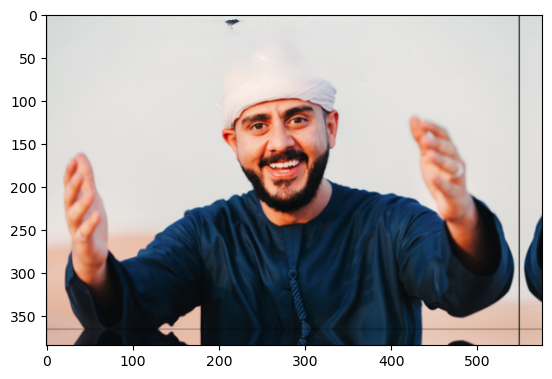

In [42]:
result = inpainting_inference(model, 
                              os.path.join(data_dir, 'img_mask_3px', image_name),
                              os.path.join(data_dir, 'img_mask_3px', image_name.replace('.png','.mask.png'))                              
                              )

result = tensor2img(result, min_max=(-1, 1))[..., ::-1]
plt.imshow(Image.fromarray(result[:,:,::-1]))#convert to rgb


load checkpoint from local path: deepfillv2_256x256_8x2_places_20200619-10d15793.pth


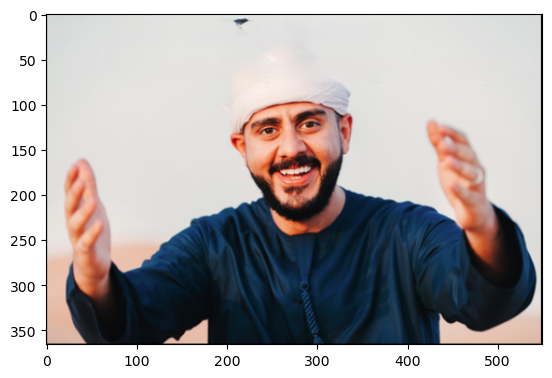

In [45]:
result = inpainting_inference(model, 
                              os.path.join(data_dir, 'img_mask_3px', image_name),
                              os.path.join(data_dir, 'img_mask_3px', image_name.replace('.png','.mask.png'))                              
                              )

result = tensor2img(result, min_max=(-1, 1))[..., ::-1]
h, w = mmcv.imread(os.path.join(data_dir, 'img_mask_3px', image_name)).shape[:2]
result = result[:h, :w, ...]
plt.imshow(Image.fromarray(result[:,:,::-1]))#convert to rgb